In [1]:
import os
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt

from numpy import expand_dims
!rm -r logdir
!rm -r "untitled_project"

%load_ext tensorboard

rm: cannot remove 'untitled_project': No such file or directory


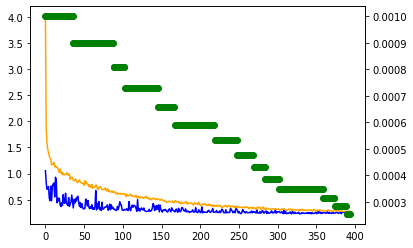

Results of the model training
11/11 [==============================] - 0s 6ms/step - loss: 0.2576 - mae: 0.2576 - mape: 5.6374 - R_Square: 0.9104
[0.2575857937335968, 0.2575857937335968, 5.637368202209473, 0.9103672504425049]


In [2]:
%run final_model_CNN1D.py

In [42]:
import tensorboard
%load_ext tensorboard
%tensorboard --logdir logdir

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

<AxesSubplot:xlabel='true', ylabel='preds'>

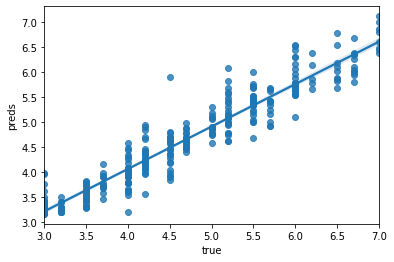

In [8]:
import pandas as pd
import numpy as np
preds = model.predict([Features_TestA, Features_TestG])
import seaborn as sns; 
#sns.set_theme(color_codes=True)
data = pd.DataFrame(np.hstack([Labels_TestA, preds]), columns = ['true', 'preds'])
sns.regplot(x = 'true', y = 'preds',data = data,)

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 3)]     0                                            
__________________________________________________________________________________________________
conv1D_A1 (Conv1D)              (None, 146, 45)      720         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 146, 45)      180         conv1D_A1[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 150, 3)]     0                                            
______________________________________________________________________________________________

In [5]:
!nvidia-smi -l 1

Wed Oct 14 00:15:28 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 440.33.01    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 207...  On   | 00000000:0A:00.0  On |                  N/A |
| 18%   45C    P2    52W / 215W |   6582MiB /  7979MiB |     24%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [10]:
filters = list()
layers = list()
for layer in model.layers:
    if "conv" in layer.name:
        print(layer.name)
        filter, bias = layer.get_weights()
        filters.append(filter)
        layers.append(layer)
        print(filter.shape)

conv1D_A1
(5, 3, 45)
conv1D_G1
(5, 3, 45)
conv1D_A2
(5, 45, 45)
conv1D_G2
(5, 45, 45)


In [11]:
# normalize filter values to 0-1 so we can visualize them
#f_min, f_max = filters.min(), filters.max()



filters = [(f - f.min()) / (f.max() - f.min()) for f in filters]

In [12]:
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(1):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

TypeError: list indices must be integers or slices, not tuple

In [13]:
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

TypeError: list indices must be integers or slices, not tuple

In [14]:
Features_TestA.shape

(323, 150, 3)

In [15]:
Features_TestA[0].shape

(150, 3)

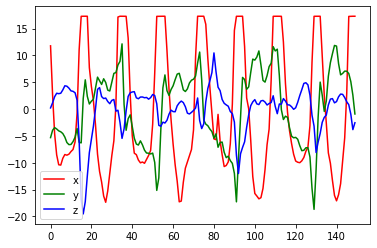

In [16]:


def plot_xyz(to_plot, plot=True,ax=None):
    if not plot:
        ax.plot(range(to_plot.shape[1]),to_plot[0], color="red", label="x")
        ax.plot(range(to_plot.shape[1]),to_plot[1], color="green", label="y")
        ax.plot(range(to_plot.shape[1]),to_plot[2], color="blue", label="z")
        ax.legend()
        plt.show()
        return ax
    else:
        plt.plot(range(to_plot.shape[1]),to_plot[0]-np.mean(to_plot[0]) , color="red", label="x")
        plt.plot(range(to_plot.shape[1]),to_plot[1]-np.mean(to_plot[1]), color="green", label="y")
        plt.plot(range(to_plot.shape[1]),to_plot[2]-np.mean(to_plot[2]), color="blue", label="z")
        plt.legend()
        plt.show()
        %matplotlib inline

to_plot= Features_TestA[10].T
plot_xyz(to_plot)

In [17]:
np.sqrt(np.square(to_plot[0]))

array([18.9673913 ,  9.83695652,  2.59782609,  1.33695652,  3.17391304,
        3.23913043,  1.97826087,  1.27173913,  1.39130435,  1.20652174,
        0.7173913 ,  0.33695652,  1.07608696,  6.45652174, 18.2173913 ,
       24.4673913 , 24.47826087, 24.47826087, 24.47826087, 14.90217391,
       11.39130435,  8.7173913 ,  4.31521739,  1.20652174,  4.42391304,
        6.39130435,  9.        , 10.16304348,  8.05434783,  4.73913043,
        1.4673913 ,  1.2826087 ,  8.        , 24.33695652, 24.47826087,
       24.47826087, 24.47826087, 24.4673913 , 20.40217391,  9.88043478,
        2.23913043,  1.02173913,  1.29347826,  2.29347826,  2.81521739,
        2.66304348,  2.90217391,  2.16304348,  1.44565217,  0.48913043,
        4.40217391, 13.90217391, 24.45652174, 24.4673913 , 24.47826087,
       24.47826087, 24.47826087, 18.08695652, 10.84782609,  5.18478261,
        0.67391304,  3.17391304,  6.22826087, 10.07608696,  9.93478261,
        6.42391304,  3.81521739,  2.66304348,  1.48913043,  0.32

In [18]:
import numpy as np
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
gradient.shape

(2, 256)

In [19]:
print([layer.name for layer in model.layers])

['input_1', 'conv1D_A1', 'batch_normalization', 'input_2', 'leaky_re_lu', 'conv1D_G1', 'conv1D_A2', 'batch_normalization_2', 'batch_normalization_1', 'leaky_re_lu_2', 'activation', 'conv1D_G2', 'global_max_pooling1d', 'batch_normalization_3', 'add', 'add_1', 'leaky_re_lu_1', 'leaky_re_lu_3', 'global_max_pooling1d_1', 'global_max_pooling1d_2', 'concatenate', 'dense', 'dropout', 'dense_1', 'dropout_1', 'dense_2']


In [20]:
mod6 = model.layers[6]


In [21]:
mod6.weights


[<tf.Variable 'conv1D_A2/kernel:0' shape=(5, 45, 45) dtype=float32, numpy=
 array([[[ 0.00627815,  0.01123231,  0.17646644, ..., -0.15648377,
           0.11713   ,  0.04144698],
         [-0.06189416,  0.1115324 ,  0.1248166 , ..., -0.02077985,
          -0.10426432, -0.05595718],
         [ 0.01572325, -0.06649309, -0.02691504, ..., -0.12567796,
          -0.318371  , -0.10665659],
         ...,
         [-0.10417326,  0.18438154,  0.05420911, ..., -0.1529315 ,
          -0.2308512 , -0.11563138],
         [-0.06463481, -0.01173058, -0.04963901, ...,  0.00878507,
          -0.05310604, -0.03753525],
         [ 0.0979187 , -0.09141959,  0.06186184, ...,  0.04741517,
          -0.22893581,  0.17819196]],
 
        [[ 0.03820433,  0.08314896,  0.01724333, ..., -0.15187554,
           0.06036754,  0.05189746],
         [ 0.01096881, -0.03402118,  0.14558142, ..., -0.05593575,
          -0.09757612, -0.1323602 ],
         [ 0.03961318, -0.16028948,  0.02206681, ...,  0.01876258,
         

In [22]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 3)]     0                                            
__________________________________________________________________________________________________
conv1D_A1 (Conv1D)              (None, 146, 45)      720         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 146, 45)      180         conv1D_A1[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 150, 3)]     0                                            
______________________________________________________________________________________________

In [23]:
# redefine model to output right after the first hidden layer
from keras.models import Model
# model_min = model.inputs[0]
# model_min = layers[0](model_min)
# model_min = layers[2](model_min)
import numpy as np
model_min=np.nan
model_min = Model(inputs=model.inputs[0], outputs=model.layers[10].output)
model_min.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 3)]          0         
_________________________________________________________________
conv1D_A1 (Conv1D)           (None, 146, 45)           720       
_________________________________________________________________
batch_normalization (BatchNo (None, 146, 45)           180       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 146, 45)           0         
_________________________________________________________________
conv1D_A2 (Conv1D)           (None, 146, 45)           10170     
_________________________________________________________________
batch_normalization_1 (Batch (None, 146, 45)           180       
_________________________________________________________________
activation (Activation)      (None, 146, 45)           0   

In [33]:
datum_ex = Features_TestA[300]
datum = expand_dims(datum_ex, axis=0)
datum_ex = datum_ex.T

In [34]:
feature_maps = model_min.predict(datum)
feature_maps

array([[[1.2570246 , 0.        , 0.04029649, ..., 0.        ,
         0.18857804, 0.        ],
        [1.0413531 , 0.        , 0.1484527 , ..., 0.        ,
         0.        , 0.        ],
        [0.6553112 , 0.        , 0.46963787, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.55759937, 0.49170518, ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.67654157, 0.3817609 , ..., 0.        ,
         0.0269863 , 0.        ],
        [0.        , 0.4746911 , 0.09787565, ..., 0.        ,
         0.45593753, 0.        ]]], dtype=float32)

In [35]:
feature_maps = feature_maps/feature_maps.max()


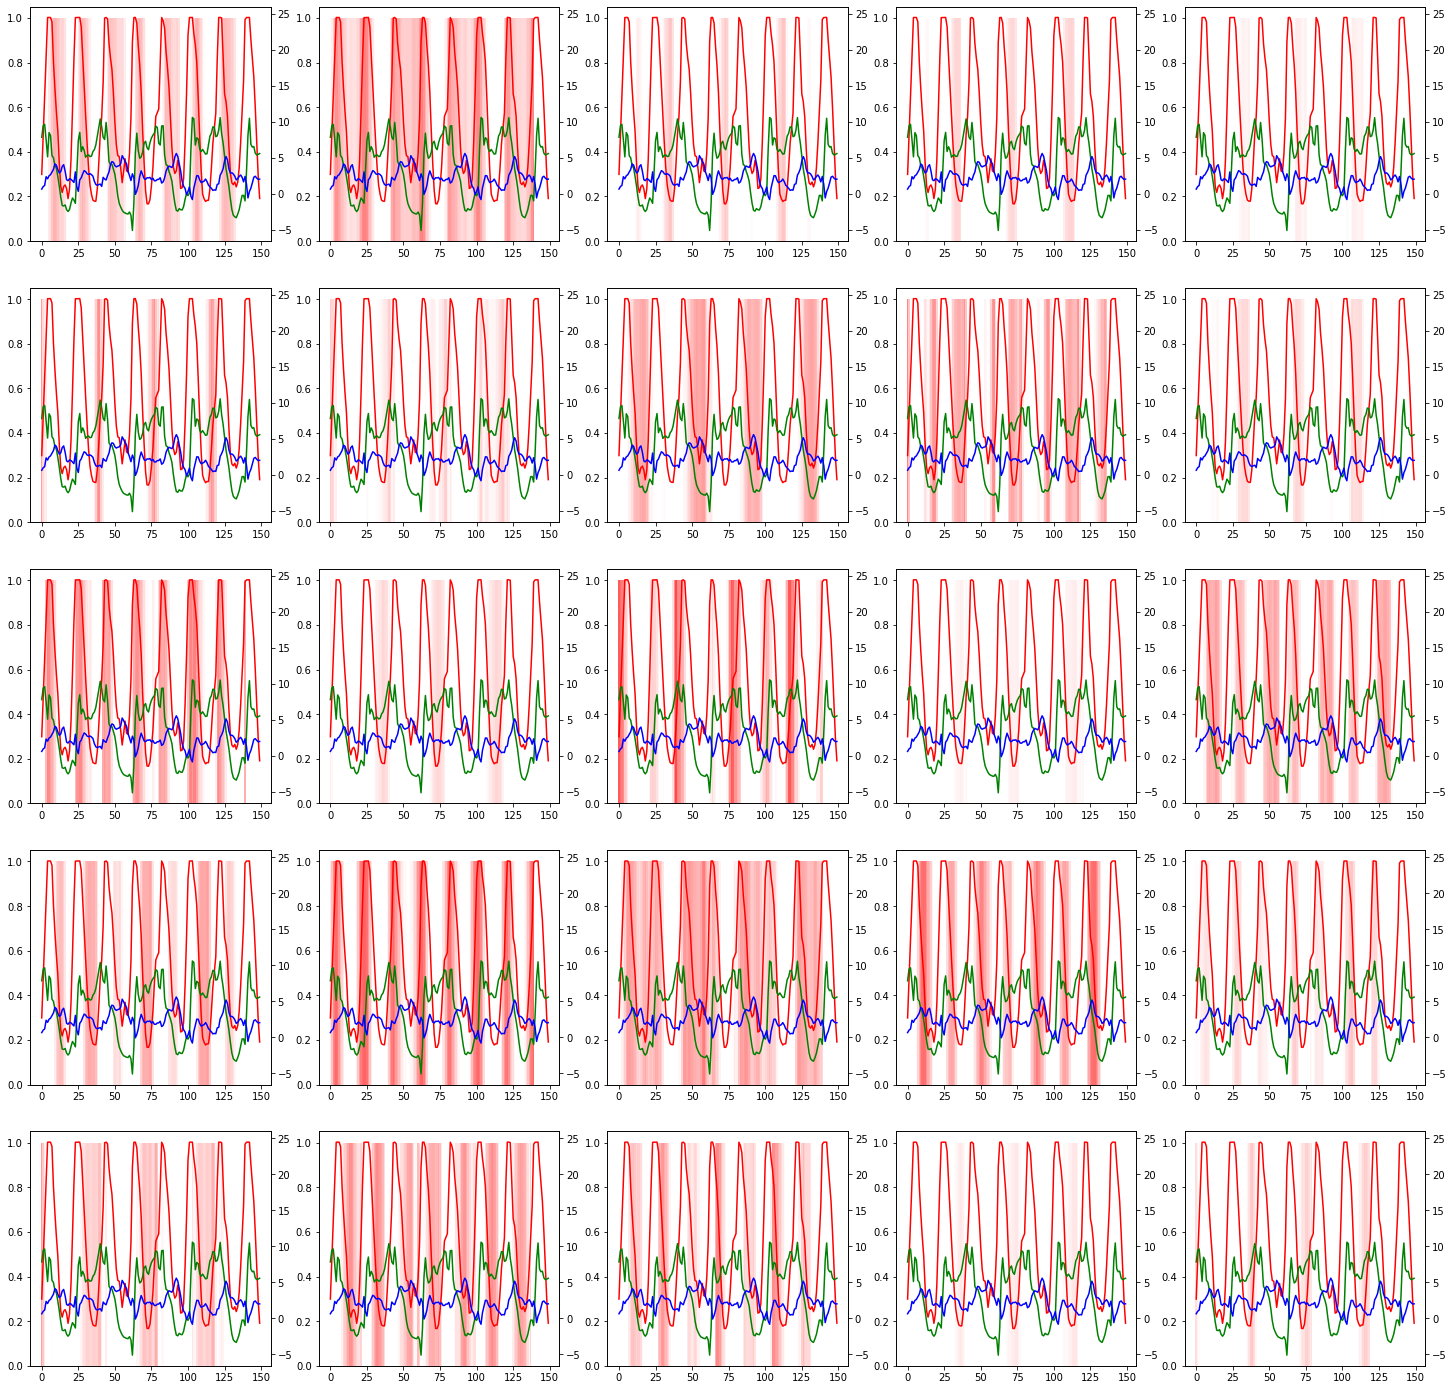

In [36]:
# plot all 64 maps in an 8x8 squares
square = 5
ix = 1

pyplot.figure(figsize=(25,25))
#pyplot.style.use('light_background')


for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis

        ax = pyplot.subplot(square, square, ix)
       # ax.set_xticks([])
        ax.set_facecolor('white')
        #ax.set_yticks([])
        # plot filter channel in grayscale
        #ax = plot_xyz(to_plot,plot=False,ax=ax)
        #pyplot.twinx()
        #pyplot.imshow(feature_maps[0, :, :, ix], aspect='auto', cmap ='PuRd', )
        #pyplot.scatter(feature_maps[0, :, ix])
        for i in range(140):
            pyplot.bar(i,1, color ="red",alpha =feature_maps[0, :, ix][i], width=1)
        pyplot.twinx()
        pyplot.plot(range(datum_ex.shape[1]),datum_ex[0], color="red", label="x")
        pyplot.plot(range(datum_ex.shape[1]),datum_ex[1], color="green", label="y")
        pyplot.plot(range(datum_ex.shape[1]),datum_ex[2], color="blue", label="z")
        #pyplot.twinx()
        ix += 1
# show the figure
pyplot.show()

In [28]:
pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray',aspect="auto")

IndexError: too many indices for array

In [29]:
plot_xyz(feature_maps[0, :, :, 0])

IndexError: too many indices for array

In [86]:
plot_xyz(feature_maps[0, :, :, 0])

IndexError: index 1 is out of bounds for axis 0 with size 1